In [1]:
import pandas as pd
import ast
import numpy as np
from tqdm.notebook import tnrange, tqdm
tqdm.pandas()


path = "./"

addresses = pd.read_csv(f"{path}addresses.csv", index_col=0)
ct_restaurants = pd.read_csv(f"{path}ct_restaurants.csv", index_col=0)
discover_ct = pd.read_csv(f"{path}discover_ct.csv", index_col=0)

restaurants = pd.read_csv(f"{path}restaurants.csv", index_col=0)
second_thread = pd.read_csv(f"{path}second_thread.csv", index_col=0)
state_data = pd.read_csv(f"{path}state_data.csv", index_col=0)
updated_state_data = pd.read_csv(f"{path}us_cities_states_counties.csv", index_col=0)

/Users/brianphelps/opt/anaconda3/envs/thesis/lib/python3.8/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
# keep only 50 states of data
updated_state_data = pd.read_csv(f"{path}us_cities_states_counties.csv", index_col=0)
state=updated_state_data.loc[updated_state_data['st_long'].isin(state_data['State'].unique())]
list_2, list_1 = state.loc[state['st_long']=='Connecticut'].city.unique(), ast.literal_eval(state_data.iloc[6]['Cities'])
import numpy as np
main_list = np.setdiff1d(list_2,list_1)
# yields the elements in `list_2` that are NOT in `list_1`

In [3]:
len(state.loc[state['st_long']=='Connecticut'].city.unique())

271

In [4]:
len(ast.literal_eval(state_data.iloc[6]['Cities']))

58

In [11]:
ct_restaurants['city'].unique().shape

(58,)

In [5]:
list_2, list_1 = state.loc[state['st_long']=='Connecticut'].city.unique(), ast.literal_eval(state_data.iloc[6]['Cities'])

In [12]:
import numpy as np
main_list = np.setdiff1d(list_2,list_1)
# yields the elements in `list_2` that are NOT in `list_1`

In [8]:
def returnList(row):
  if type(row)==str:
    try:
      result = ast.literal_eval(row)
    except:
      result = row
    return result
  else:
    return np.nan
  
#fix data lists
data_lists = ['attributes', 'hours', 'pictures']
pbar = tqdm(data_lists)
for data in pbar:
    pbar.set_description(f"Processing {data}")
    ct_restaurants[data] = ct_restaurants[data].apply(returnList)

### Visualise Missing Values

<AxesSubplot:>

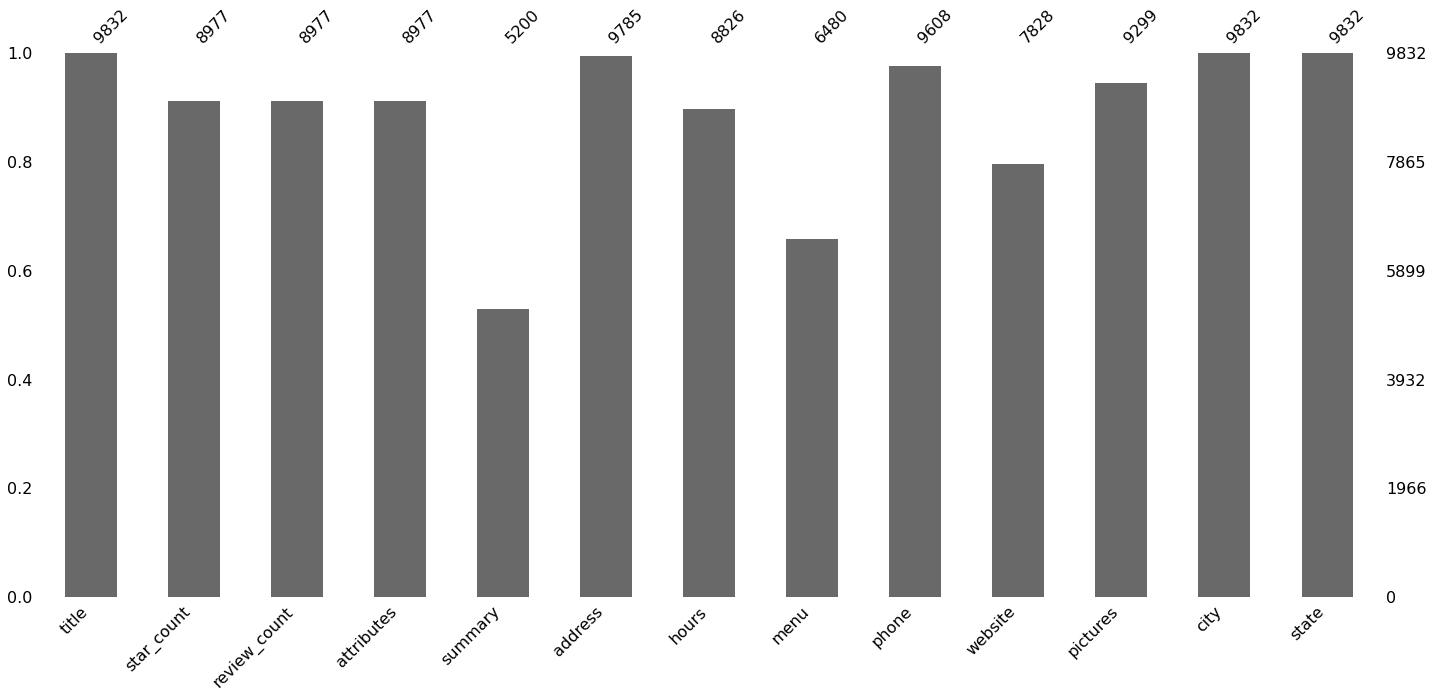

In [9]:
import missingno as msno
msno.bar(ct_restaurants)

#### Drop rows without address or phone number

In [4]:
ct_restaurants['hours'][0]

{'Tuesday': '11AM–9:30PM',
 'Wednesday': '11AM–9:30PM',
 'Thursday': '11AM–9:30PM',
 'Friday': '11AM–10:30PM',
 'Saturday': '11AM–10:30PM',
 'Sunday': '11AM–9:30PM',
 'Monday': '11AM–9:30PM'}

In [5]:
ct_restaurants.dropna(subset=['address', 'phone']).reset_index(drop=True)

,title,star_count,review_count,attributes,summary,address,hours,menu,phone,website,pictures,city,state
0,Crave,4.5,676 Google reviews,"[$$, Spanish restaurant]",Caribbean fusion cuisine & cocktails with a bi...,"102 Main St, Ansonia, CT 06401","{'Tuesday': '11AM–9:30PM', 'Wednesday': '11AM–...",http://crave102.com/home/the-menu/lunch/,(203) 735-3300,http://www.crave102.com/,[https://lh5.googleusercontent.com/p/AF1QipML8...,Ansonia,Connecticut
1,Area 143,5.0,20 Google reviews,[Restaurant],NaN,"143 N Main St, Ansonia, CT 06401","{'Tuesday': '12–10PM', 'Wednesday': '12–10PM',...",http://places.singleplatform.com/area-143/menu...,(203) 516-5456,NaN,[https://lh5.googleusercontent.com/p/AF1QipNzQ...,Ansonia,Connecticut
2,Massimino's Pizzeria,4.5,147 Google reviews,"[$, Pizza restaurant]",NaN,"85 Main St, Ansonia, CT 06401","{'Tuesday': '11AM–10PM', 'Wednesday': '11AM–10...",NaN,(203) 732-2000,NaN,[https://lh5.googleusercontent.com/p/AF1QipNm8...,Ansonia,Connecticut
3,Roma Pizzeria,4.7,213 Google reviews,"[$$, Pizza restaurant]",NaN,"150 Wakelee Ave, Ansonia, CT 06401","{'Tuesday': '11AM–10PM', 'Wednesday': '11AM–10...",https://www.romact.com/menu,(203) 734-6815,http://www.romact.com/,[https://lh5.googleusercontent.com/p/AF1QipPS2...,Ansonia,Connecticut
4,Bangkok Room,4.7,130 Google reviews,"[$$, Thai restaurant]",NaN,"76 Main St, Ansonia, CT 06401","{'Tuesday': '11:30AM–2:30PM, 4:30–8:30PM', 'We...",NaN,(203) 516-5345,http://www.bangkokroomct.com/,[https://lh5.googleusercontent.com/p/AF1QipM6m...,Ansonia,Connecticut
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9558,Pizzeria Marzano,4.7,304 Google reviews,"[$$, Pizza restaurant]",NaN,"1315 E Main St, Torrington, CT 06790","{'Saturday': '11:30AM–10PM', 'Sunday': '12–6:3...",http://places.singleplatform.com/pizzaria-marz...,(860) 618-0875,http://www.pizzeriamarzano.com/,[https://lh5.googleusercontent.com/p/AF1QipN9Y...,Winsted,Connecticut
9559,Fuji Japanese & Hibachi Steak Restaurant,4.5,224 Google reviews,"[$$, Japanese restaurant]",Familiar spot featuring hibachi chefs cooking ...,"1883 E Main St, Torrington, CT 06790","{'Saturday': '11AM–11PM', 'Sunday': '12–10PM',...",NaN,(860) 482-9308,http://fujict.com/,[https://lh5.googleusercontent.com/p/AF1QipNLP...,Winsted,Connecticut
9560,Simply Seafood,4.6,133 Google reviews,[Seafood restaurant],NaN,"668 Riverside Ave, Torrington, CT 06790","{'Saturday': '11AM–9PM', 'Sunday': '11AM–7PM',...",NaN,(860) 618-5640,NaN,[https://lh5.googleusercontent.com/p/AF1QipOx9...,Winsted,Connecticut
9561,Dunkin,4.0,112 Google reviews,"[$, Coffee shop]","Long-running chain serving signature donuts, b...","507 Main St, New Hartford, CT 06057",NaN,https://www.dunkindonuts.com/en/food-drinks?ut...,(860) 379-7002,https://www.dunkindonuts.com/?utm_source=googl...,[https://lh5.googleusercontent.com/p/AF1QipPo8...,Winsted,Connecticut


In [6]:
attributes = list(set([item for sublist in ct_restaurants['attributes'].dropna() for item in sublist]))

In [7]:
attributes.sort()

In [8]:
attributes

['',
 '$',
 '$$',
 '$$$',
 '$$$$',
 '2-star hotel',
 '3-star hotel',
 '4-star hotel',
 'Afghani restaurant',
 'African restaurant',
 'American restaurant',
 'Amphitheatre in Hartford, Connecticut',
 'Amusement center',
 'Arena in Hartford, Connecticut',
 'Art studio',
 'Asian Grocery Shop',
 'Asian fusion restaurant',
 'Asian restaurant',
 'Association in Farmington, Connecticut',
 'Association or organization',
 'Authentic Japanese restaurant',
 'Bagel shop',
 'Bakery',
 'Banquet hall',
 'Bar',
 'Bar & grill',
 'Barbecue area',
 'Barbecue restaurant',
 'Basque restaurant',
 'Beach in Fairfield, Connecticut',
 'Belgian restaurant',
 'Bistro',
 'Bowling Alley',
 'Bowling alley',
 'Brazilian restaurant',
 'Breakfast restaurant',
 'Brewery',
 'Brewpub',
 'Brunch restaurant',
 'Buffet restaurant',
 'Butcher shop',
 'Butcher shop deli',
 'Butchers',
 'Cafe',
 'Cajun restaurant',
 'Californian restaurant',
 'Caribbean restaurant',
 'Caterer',
 'Catering',
 'Catering food and drink supplier',